In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




In [17]:
# Load the dataset
# Assuming your CSV file is named 'heart_attack_data.csv' and is in the same directory
df = pd.read_csv('data/heart.csv')

# Display first few rows and basic information about the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())

First few rows of the dataset:
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 

In [18]:

# Separate features (X) and target variable (y)
# Replace 'target' with your actual target column name
X = df.drop('output', axis=1)  
y = df['output']

# Split the data into training and testing sets -- random_state is the seed
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [19]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8524590163934426

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Confusion Matrix:
[[25  4]
 [ 5 27]]


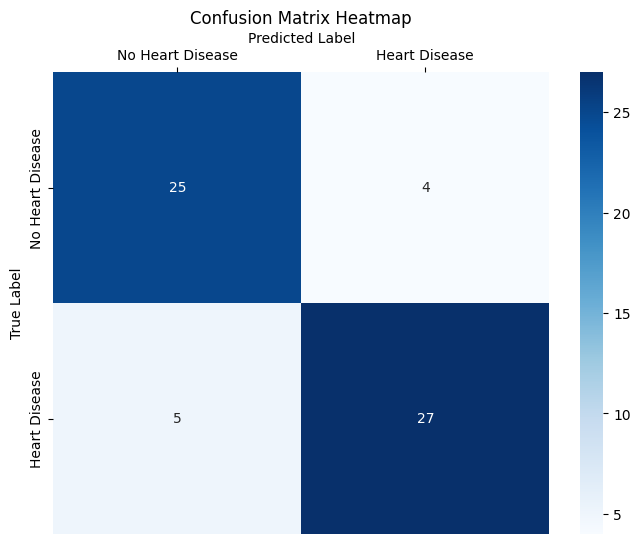

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Heart Disease', 'Heart Disease'],
            yticklabels=['No Heart Disease', 'Heart Disease'])  # Removed xticklabels_position
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
# Move x-axis labels to the top
plt.gca().xaxis.set_label_position('top')  # Move x-axis label to the top
plt.gca().xaxis.tick_top()  # Move the x-axis ticks to the top
plt.show()

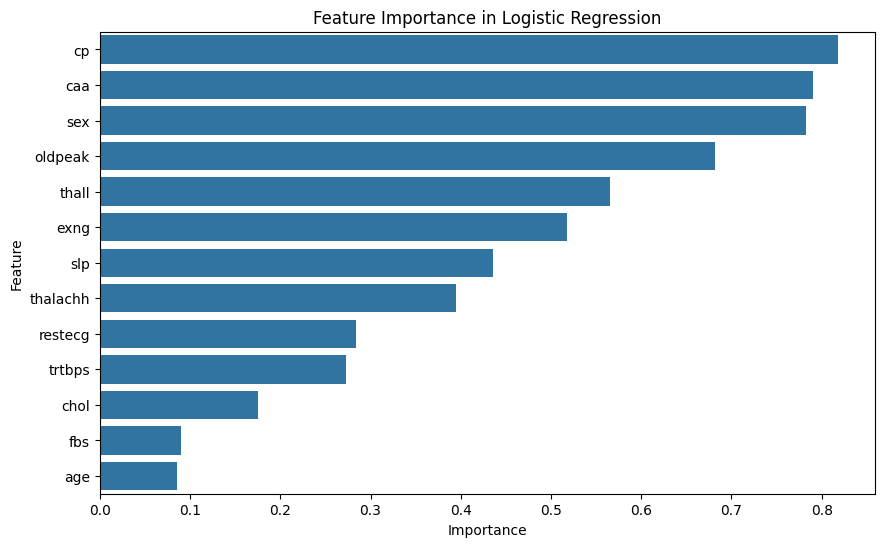

In [21]:
# 2. Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

In [22]:
# 3. Calculate and display key metrics
precision = classification_report(y_test, y_pred, output_dict=True)
print("\nKey Metrics Summary:")
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision (Heart Disease): {precision['1']['precision']:.3f}")
print(f"Recall (Heart Disease): {precision['1']['recall']:.3f}")
print(f"F1-Score (Heart Disease): {precision['1']['f1-score']:.3f}")



Key Metrics Summary:
Overall Accuracy: 0.852
Precision (Heart Disease): 0.871
Recall (Heart Disease): 0.844
F1-Score (Heart Disease): 0.857


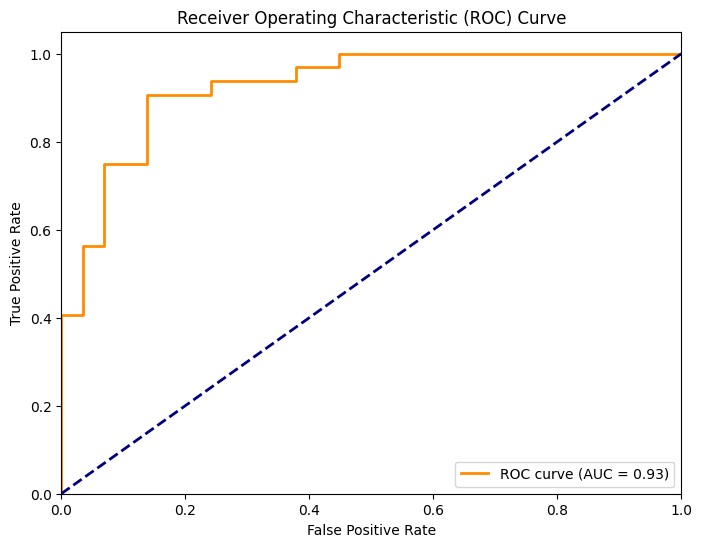

In [23]:
# 4. ROC Curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()